#Q2

In [2]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from keras.layers import Flatten, Conv2D, Dense, MaxPool2D

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 21s 0us/step


In [4]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

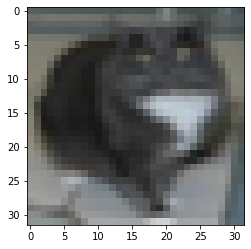

In [6]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [7]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(Flatten())
# fc_model.add(Dense(128, activation='sigmoid'))
fc_model.add(Dense(64, activation='sigmoid'))
fc_model.add(Dense(32, activation='sigmoid'))
fc_model.add(Dense(16, activation='sigmoid'))
fc_model.add(Dense(10, activation='sigmoid'))
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 199,450
Trainable params: 199,450
Non-trainable params: 0
_________________________________________________________________


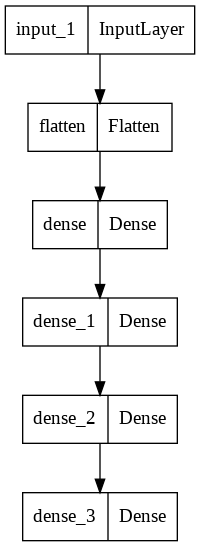

In [9]:
plot_model(fc_model)

In [10]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
Conv_model.add(Conv2D(32, 3, activation='relu'))
Conv_model.add(MaxPool2D())
Conv_model.add(Conv2D(64, 3, activation='relu'))
Conv_model.add(MaxPool2D())
Conv_model.add(Conv2D(128, 3, activation='relu'))
Conv_model.add(MaxPool2D())
# you can use pool layers after Conv layers
Conv_model.add(Flatten())
Conv_model.add(Dense(10, activation='softmax'))
Conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)       

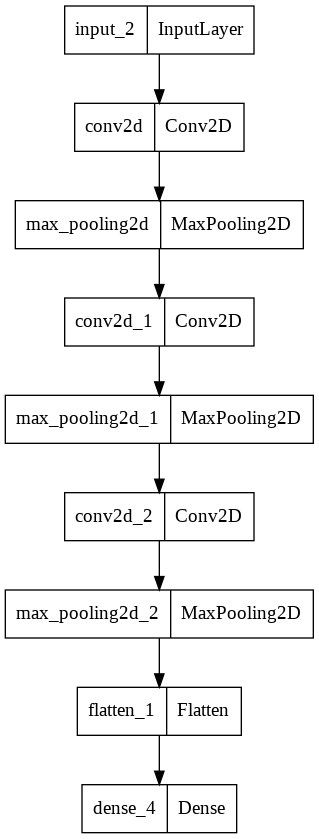

In [11]:
plot_model(Conv_model)

In [17]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 2.1602 - accuracy: 0.1621
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0803 - accuracy: 0.1827
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0670 - accuracy: 0.1883
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0523 - accuracy: 0.2000
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0323 - accuracy: 0.2188


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 2.0170 - accuracy: 0.2368


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.4952 - accuracy: 0.4565
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1699 - accuracy: 0.5900
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0381 - accuracy: 0.6379
Epoch 4/5
1563/1563 [==

#Q3

In [12]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [13]:
!rm -r sample_data

In [14]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:02<00:00, 268MB/s]


In [15]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [16]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [66]:
def resize_img(img, desired_size = 224):
    # write your code here
    new_img = my_img = tf.image.resize_with_pad(img,
                                                224,
                                                224,
                                                method=tf.image.ResizeMethod.BILINEAR,
                                                antialias=False
                                              )
    new_img /= 255
    new_img = np.array(new_img,np.float64)
    return new_img

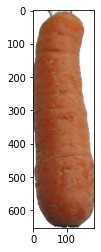

In [67]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

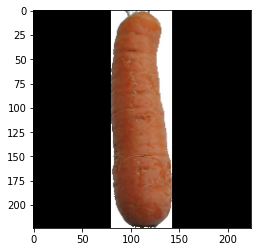

In [68]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [70]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [54]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [58]:
pre_trained_random_resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                                                    weights=None,
                                                                    input_tensor=None,
                                                                    input_shape=(224,224,3),
                                                                    pooling=None,
                                                                    classes=24,
                                                                    )

In [90]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.add(pre_trained_random_resnet)
resnet.add(Flatten())
resnet.add(Dense(1024, activation='relu'))
resnet.add(Dense(512, activation='relu'))
resnet.add(Dense(256, activation='relu'))
resnet.add(Dense(128, activation='relu'))
resnet.add(Dense(64, activation='relu'))
resnet.add(Dense(24, activation='softmax'))
resnet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 1024)        2098176   
                                                                 
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 dense_22 (Dense)            (None, 1024)              51381248  
                                                                 
 dense_23 (Dense)            (None, 512)               524800    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 128)              

In [91]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [92]:
resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 118s 2s/step - loss: 5.3496 - acc: 0.0799


## C : Fine-tune Resnet50 on fruits dataset.

In [81]:
pre_trained_imagenet_resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                                                      weights='imagenet',
                                                                      input_tensor=None,
                                                                      input_shape=(224,224,3),
                                                                      pooling=None,
                                                                      classes=24,
                                                                      )

for layer in pre_trained_imagenet_resnet.layers:
  layer.trainable = False

In [86]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 

fine_tune_resnet.add(pre_trained_imagenet_resnet)
fine_tune_resnet.add(Flatten())
fine_tune_resnet.add(Dense(1024, activation='relu'))
fine_tune_resnet.add(Dense(512, activation='relu'))
fine_tune_resnet.add(Dense(256, activation='relu'))
fine_tune_resnet.add(Dense(128, activation='relu'))
fine_tune_resnet.add(Dense(64, activation='relu'))
fine_tune_resnet.add(Dense(24, activation='softmax'))

fine_tune_resnet.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 1024)        2098176   
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_16 (Dense)            (None, 1024)              51381248  
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)              

In [87]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [88]:
fine_tune_resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 73s 1s/step - loss: 5.8428 - acc: 0.0473


## Test models

In [93]:
resnet.evaluate(test_generator)

33/33 [==============================] - 34s 1s/step - loss: 3.1529 - acc: 0.0752


[3.152940273284912, 0.07524115592241287]

In [89]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 35s 1s/step - loss: 3.1753 - acc: 0.0521


[3.175304651260376, 0.052090033888816833]